# Quick start

Welcome to the quick start guide for AlphaGenome! The goal of this tutorial notebook is to quickly get you started with using the model and making predictions.

```{tip}
Open this tutorial in Google colab for interactive viewing.
```

In [1]:
# @title Install AlphaGenome

# @markdown Run this cell to install AlphaGenome.
from IPython.display import clear_output
! pip install alphagenome
clear_output()

## Imports

In [2]:
# @title Default title text
from alphagenome import colab_utils
from alphagenome.data import gene_annotation
from alphagenome.data import genome
from alphagenome.data import transcript as transcript_utils
from alphagenome.interpretation import ism
from alphagenome.models import dna_client
from alphagenome.models import variant_scorers
from alphagenome.visualization import plot_components
import matplotlib.pyplot as plt
import pandas as pd



## Predict outputs for a DNA sequence

AlphaGenome is a model that makes predictions from DNA sequences. Let's load it up:



In [3]:
dna_model = dna_client.create(colab_utils.get_api_key())

The model can make predictions for the following [output types](https://www.alphagenomedocs.com/exploring_model_metadata.html):

**BRCA1: rs12516, Breast-ovarian cancer, familial, susceptibility to, 1**

In [4]:
interval = genome.Interval(chromosome='chr17', start=42520103, end=43568679)


In [5]:
variant = genome.Variant(
    chromosome='chr17',
    position=	43044391 ,
    reference_bases='C',
    alternate_bases='T',
)

In [17]:
#Load ontology IDs for human to select cell type or tissue for "ontology_terms" in the model
output_metadata_mm = dna_model.output_metadata(
organism=dna_client.Organism.HOMO_SAPIENS
).concatenate()

In [9]:
output_metadata_mm

,name,strand,Assay title,ontology_curie,biosample_name,biosample_type,biosample_life_stage,data_source,endedness,genetically_modified,output_type,gtex_tissue,histone_mark,transcription_factor
0,CL:0000084 ATAC-seq,.,ATAC-seq,CL:0000084,T-cell,primary_cell,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN
1,CL:0000100 ATAC-seq,.,ATAC-seq,CL:0000100,motor neuron,in_vitro_differentiated_cells,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN
2,CL:0000236 ATAC-seq,.,ATAC-seq,CL:0000236,B cell,primary_cell,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN
3,CL:0000623 ATAC-seq,.,ATAC-seq,CL:0000623,natural killer cell,primary_cell,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN
4,CL:0000624 ATAC-seq,.,ATAC-seq,CL:0000624,"CD4-positive, alpha-beta T cell",primary_cell,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,ENCSR182QNJ,-,PRO-cap,EFO:0001099,Caco-2,cell_line,NaN,encode,NaN,False,OutputType.PROCAP,NaN,NaN,NaN
8,ENCSR740IPL,-,PRO-cap,EFO:0002067,K562,cell_line,NaN,encode,NaN,False,OutputType.PROCAP,NaN,NaN,NaN
9,ENCSR797DEF,-,PRO-cap,EFO:0002819,Calu3,cell_line,NaN,encode,NaN,False,OutputType.PROCAP,NaN,NaN,NaN
10,ENCSR801ECP,-,PRO-cap,CL:0002618,endothelial cell of umbilical vein,primary_cell,NaN,encode,NaN,False,OutputType.PROCAP,NaN,NaN,NaN


In [12]:
outputs = dna_model.predict_variant(
    interval=interval,
    variant=variant,
    ontology_terms=['UBERON:0008367'],  # Example ontology term for a cell/tissue type (e.g., UBERON:0008367 for breast epithelium, assay typetotal RNA-seq	)
    requested_outputs=[dna_client.OutputType.RNA_SEQ],  # Example: request RNA-seq predictions
)

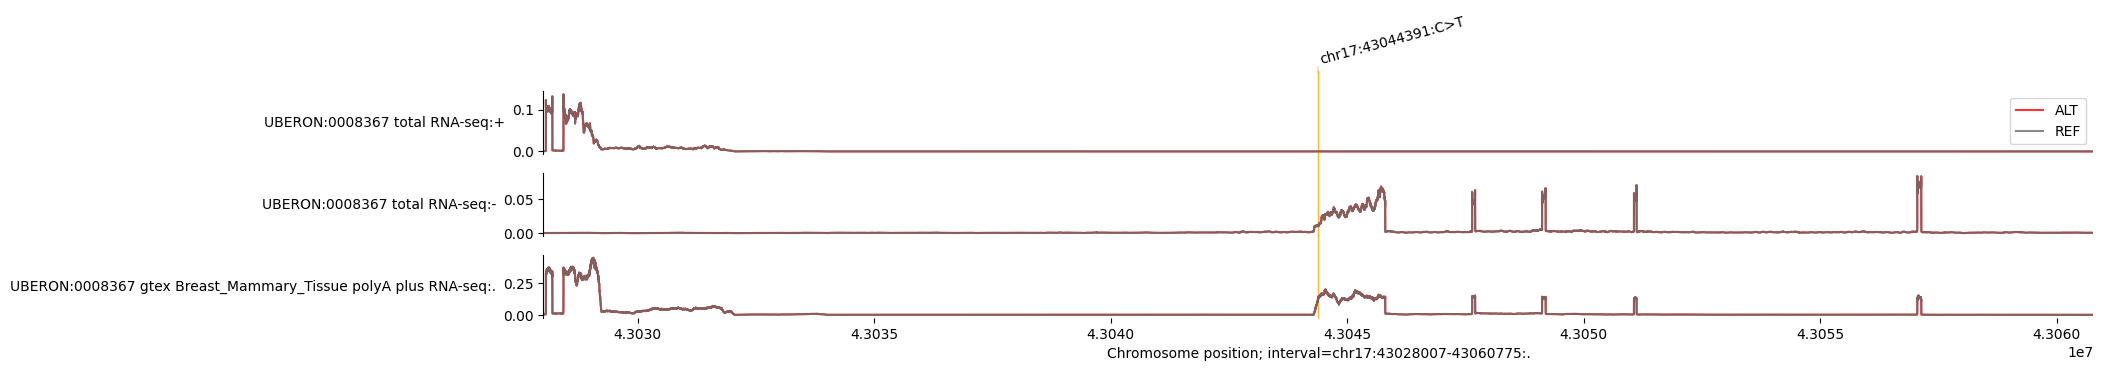

In [14]:
plot_components.plot(
    [
        plot_components.OverlaidTracks(
            tdata={
                'REF': outputs.reference.rna_seq,
                'ALT': outputs.alternate.rna_seq,
            },
            colors={'REF': 'dimgrey', 'ALT': 'red'},
        ),
    ],
    interval=outputs.reference.rna_seq.interval.resize(2**15),
    # Annotate the location of the variant as a vertical line.
    annotations=[plot_components.VariantAnnotation([variant], alpha=0.8)],
)
plt.show()


In [22]:
outputs.alternate.rna_seq

TrackData(values=array([[0.03442383, 0.00127411, 0.14746094],
       [0.04052734, 0.00162506, 0.16308594],
       [0.046875  , 0.0019989 , 0.1796875 ],
       ...,
       [0.00166321, 0.00032425, 0.00363159],
       [0.00239563, 0.00052643, 0.00601196],
       [0.00285339, 0.00070572, 0.00765991]], dtype=float32), metadata=                                                name strand  \
0                       UBERON:0008367 total RNA-seq      +   
1                       UBERON:0008367 total RNA-seq      -   
2  UBERON:0008367 gtex Breast_Mammary_Tissue poly...      .   

          Assay title  ontology_curie     biosample_name biosample_type  \
0       total RNA-seq  UBERON:0008367  breast epithelium         tissue   
1       total RNA-seq  UBERON:0008367  breast epithelium         tissue   
2  polyA plus RNA-seq  UBERON:0008367  breast epithelium         tissue   

  biosample_life_stage            gtex_tissue data_source endedness  \
0                adult                            

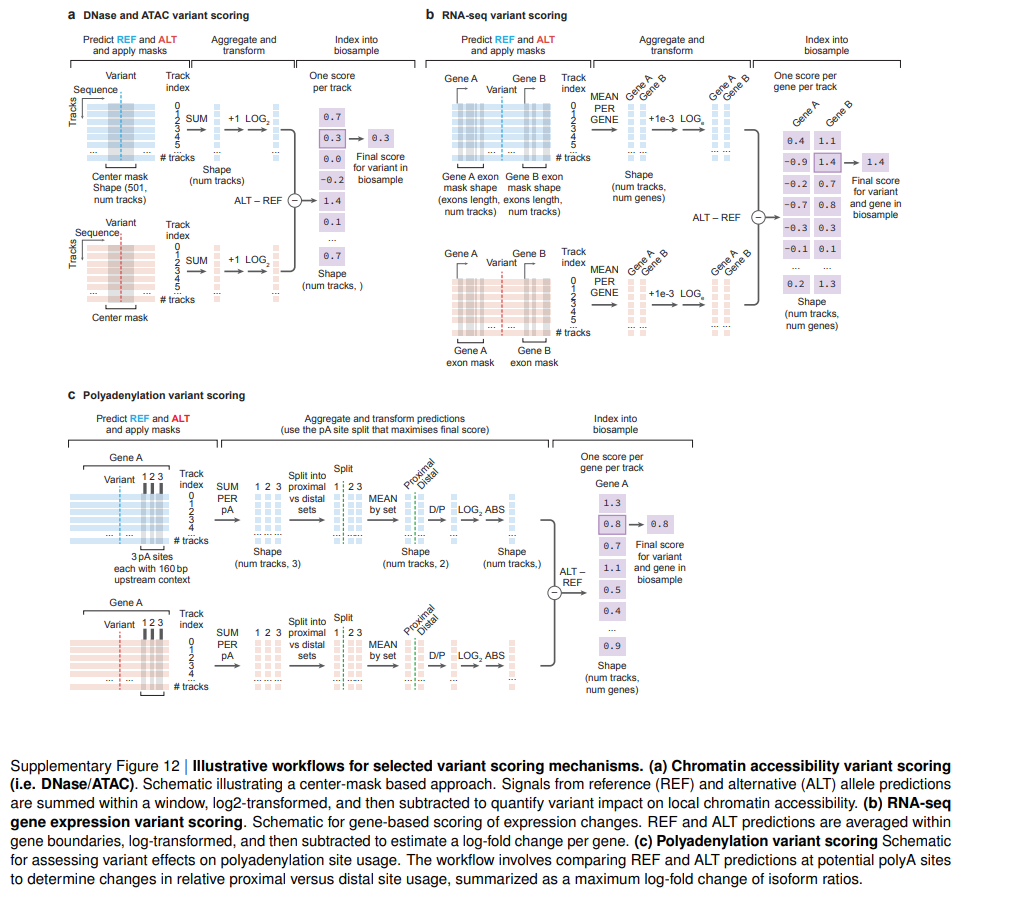

https://storage.googleapis.com/deepmind-media/papers/alphagenome.pdf